In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the dataset to google colab
from google.colab import files
uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


In [ ]:
# Reading the file in csv format
df = pd.read_csv('Real estate.csv')

In [ ]:
# To view the first and last 5 rows of the dataset
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
# Finding the number of rows , columns and data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
# To check the shape or size of the dataset
df.shape

(414, 8)

### **Data pre-processing**




In [ ]:
# To find the presence of null values and their corresponding counts
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

It is found that there are no null values in the dataset.

In [ ]:
# To find the number of zeroes in the dataset.
(df==0).sum()

No                                         0
X1 transaction date                        0
X2 house age                              17
X3 distance to the nearest MRT station     0
X4 number of convenience stores           67
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

It is observed that there are 17 and 67 zeroes for house age and number of convenience stores. As per my understanding, the chance of having zero values for these variables is acceptable.

In [ ]:
# To check for duplicate rows in the dataset
df.duplicated().sum()

0

There are no duplicates in this dataset

In [ ]:
# Mini Statistical Report
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


MSR taken before the data cleaning

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


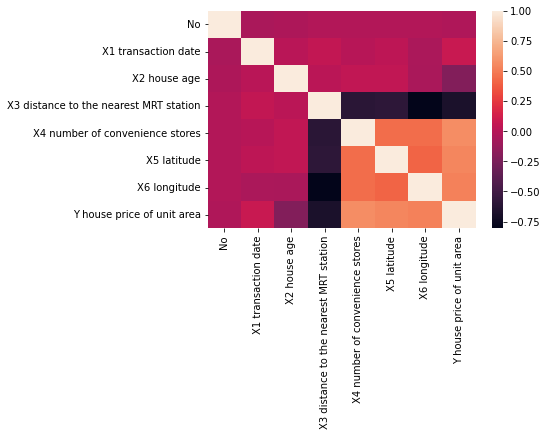

In [ ]:
# Finding the correlation between independent and dependent variables
sns.heatmap(df.corr())
df.corr()


It is observed that the features X4,X5 & X6 are highly correlated with the target variable. Hence it is noted that the 'house price' (target variable) depends much on the no of convenience stores,latitude & longitude of the house. 

**Outliers**

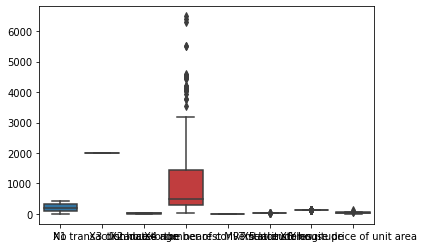

In [ ]:
# Finding the outliers of the dataset through visualisation
sns.boxplot(data=df)

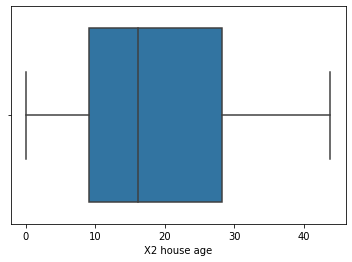

In [ ]:
sns.boxplot(x=df['X2 house age'])

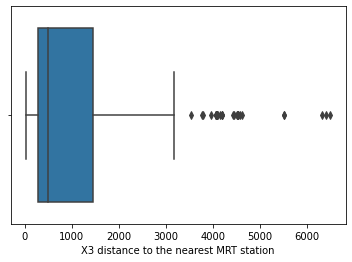

In [ ]:
sns.boxplot(x=df['X3 distance to the nearest MRT station'])

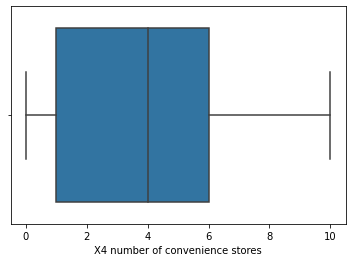

In [ ]:
sns.boxplot(x=df['X4 number of convenience stores'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


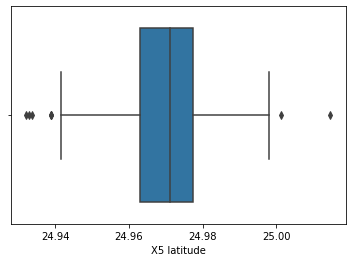

In [ ]:
sns.boxplot(df['X5 latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


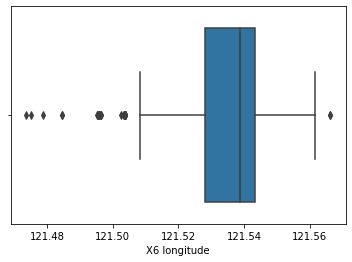

In [ ]:
sns.boxplot(df['X6 longitude'])

# **Data Visualisation**

**X1 Transaction date variable**

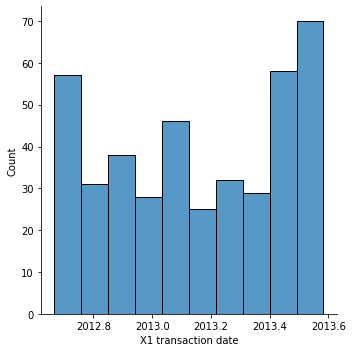

In [ ]:
sns.displot(x=df['X1 transaction date'])

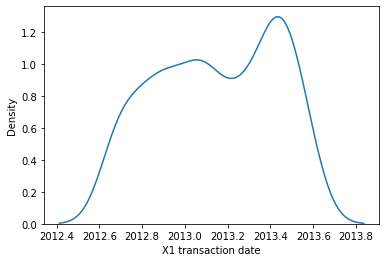

In [ ]:
sns.kdeplot(x=df['X1 transaction date'])

It is observed that the X1 variable is negatively skewed and more transactions happened on 2013.5

X2 house age

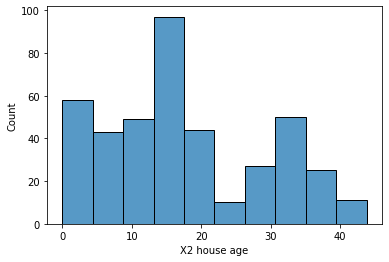

In [ ]:
sns.histplot(x=df['X2 house age'])

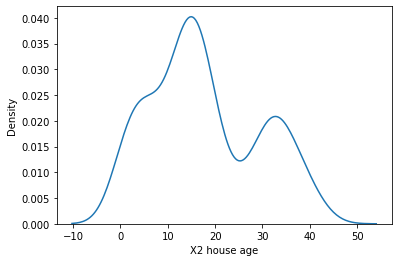

In [ ]:
sns.kdeplot(x=df['X2 house age'])

It is observed that the there are approximately 97 houses are in the age group of 15. This variable is positively skewed.

X3 distance to the nearest MRT station

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


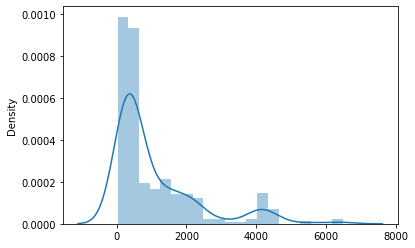

In [ ]:
sns.distplot(x=df['X3 distance to the nearest MRT station'])

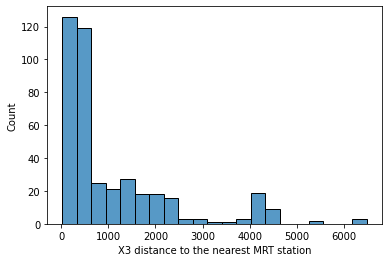

In [ ]:
sns.histplot(df['X3 distance to the nearest MRT station'])

It is observerd that X3 is positively skewed and there are more houses within the distance of 0 to 660 m approximately

X4 number of convenience stores

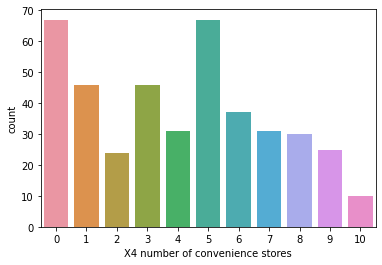

In [ ]:
sns.countplot(x=df['X4 number of convenience stores'])

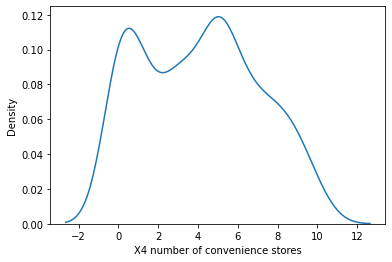

In [ ]:
sns.kdeplot(x=df['X4 number of convenience stores'])

X4 is positively skewed and maximum number of houses have 5 stores near to them.

X5 Latitude

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


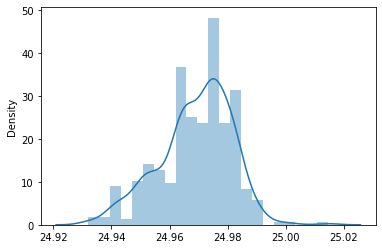

In [ ]:
sns.distplot(x=df['X5 latitude'])

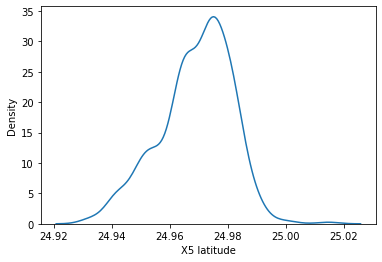

In [ ]:
sns.kdeplot(x=df['X5 latitude'])

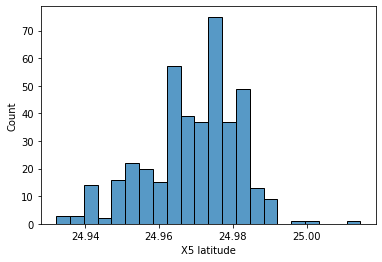

In [ ]:
sns.histplot(df['X5 latitude'])

X5 is negatively skewed

X6 **Longitude**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


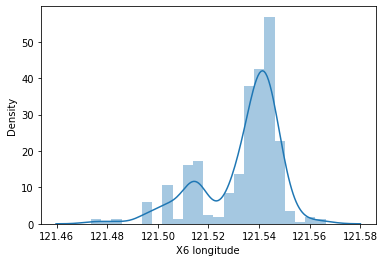

In [ ]:
sns.distplot(df['X6 longitude'])

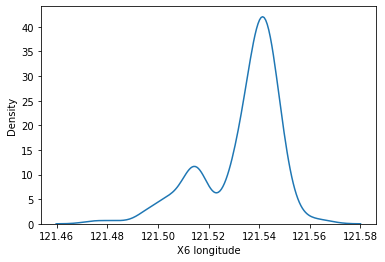

In [ ]:
sns.kdeplot(df['X6 longitude'])

X6 is negatively skewed

**Multivariate Visualisation**

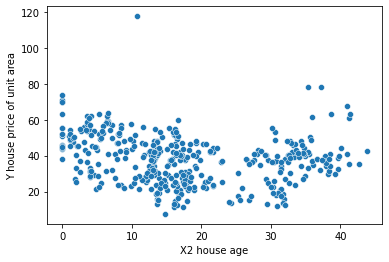

In [ ]:
sns.scatterplot(x=df['X2 house age'],y=df['Y house price of unit area'])

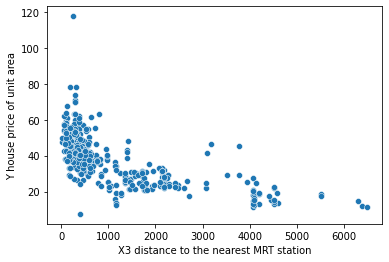

In [ ]:
sns.scatterplot(x=df['X3 distance to the nearest MRT station'],y=df['Y house price of unit area'])

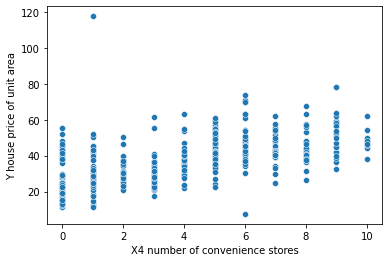

In [ ]:
sns.scatterplot(x=df['X4 number of convenience stores'],y=df['Y house price of unit area'])

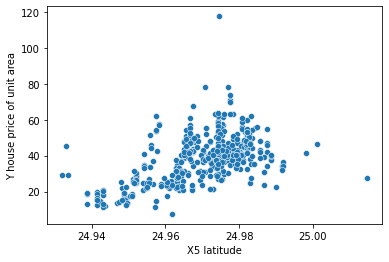

In [ ]:
sns.scatterplot(x=df['X5 latitude'],y=df['Y house price of unit area'])

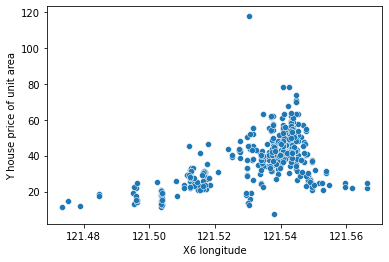

In [ ]:
sns.scatterplot(x=df['X6 longitude'],y=df['Y house price of unit area'])

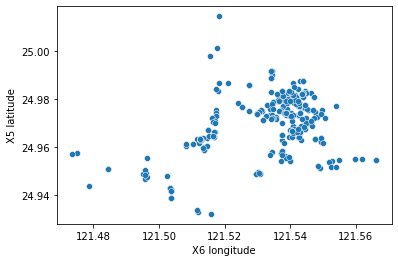

In [ ]:
sns.scatterplot(x=df['X6 longitude'],y=df['X5 latitude'])

1. If the house age increases, house price decreases.
2. Convenience stores increases, house price increases.
3. distance to MRT station increase, house price decreases.
4. if latitude and longitude increases, house price increases.
5. if longitude increases, latitude increases.
6. In all the above plots, identified a data point which is an outlier having house price of approximately 120

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Scaling data using standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [ ]:
s.fit_transform(x)

array([[-1.72787215, -0.82368321,  1.25562833, ...,  2.00740743,
         1.12542986,  0.44876222],
       [-1.71950473, -0.82368321,  0.15708622, ...,  1.66750286,
         0.91244418,  0.40113894],
       [-1.71113731,  1.54115111, -0.38779067, ...,  0.30788458,
         1.48686011,  0.68818339],
       ...,
       [ 1.71113731,  0.35873395,  0.09556786, ...,  0.98769372,
         0.82289338,  0.42397202],
       [ 1.71950473, -0.52896662, -0.84478419, ...,  0.30788458,
        -0.18475479,  0.4768143 ],
       [ 1.72787215,  1.24643452, -0.98539758, ...,  1.66750286,
         0.42757905,  0.63534112]])

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=111)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = LR.predict(x_test)

## Evaluation Metrics 

For a regression problem, we have to find the following metrics
1. R squared
2. MSE
3. RMSE
4. MAE

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
R2 = r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print('R squared is',R2,'\n','MAE is',MAE,'\n','RMSE is',RMSE)

R squared is 0.7010515531287655 
 MAE is 5.883738407534702 
 RMSE is 7.282195692932211


1.The above metrics shows that the accuracy of the predicted model as 0.70. That is 70% of the predicted house price  fits in the regressor line.
2. The MAE shown as 5.88 that is the mean value of the difference between predicted and expected house price.
3. The RMSE is 7.28 that is the mean of the error data points